In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
df = pd.read_csv("./dataset/machine failure.csv")
column_selected = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
                   'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',  'RNF', 'Machine failure']

df = df[column_selected]
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Convert data types to float
df = df.astype(float)

In [5]:
# Data Cleaning: Check for missing value
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   TWF                      10000 non-null  float64
 6   HDF                      10000 non-null  float64
 7   PWF                      10000 non-null  float64
 8   OSF                      10000 non-null  float64
 9   RNF                      10000 non-null  float64
 10  Machine failure          10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


Text(0.5, 1.0, 'Corelation Matrix')

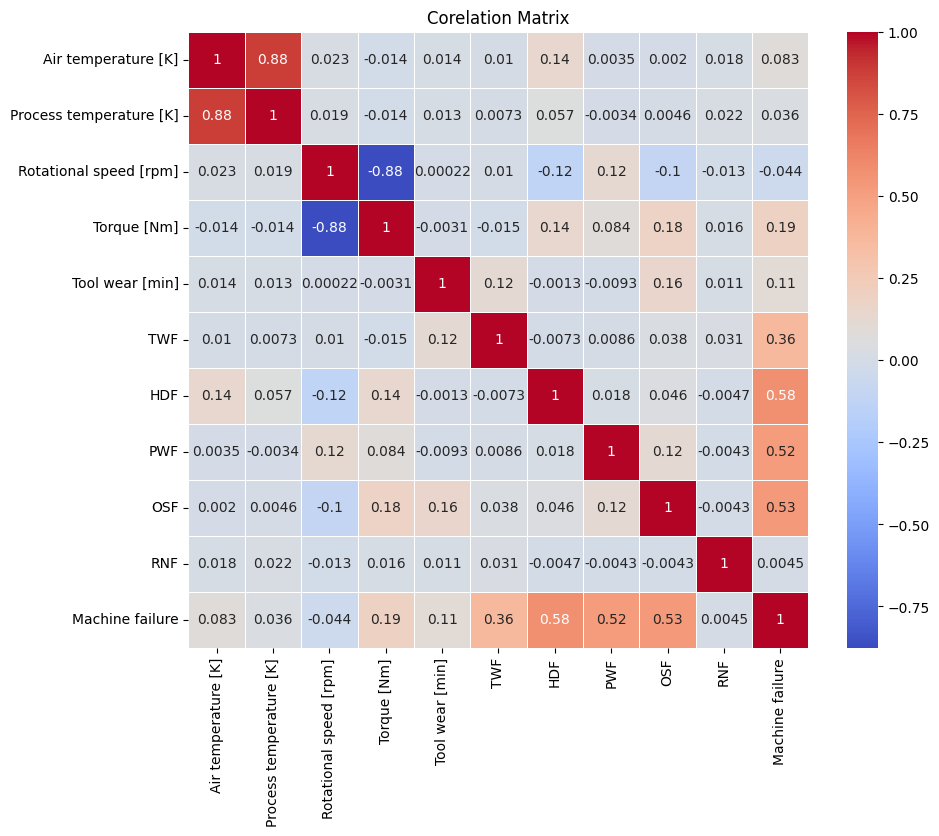

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Corelation Matrix")

In [16]:
df.columns = (
    df.columns.str.lower()
    .str.replace(r'[\s\[\]]', '_', regex=True)
)

In [19]:
df.columns

Index(['air_temperature__k_', 'process_temperature__k_',
       'rotational_speed__rpm_', 'torque__nm_', 'tool_wear__min_', 'twf',
       'hdf', 'pwf', 'osf', 'rnf', 'machine_failure'],
      dtype='object')

In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = df[['air_temperature__k_', 'process_temperature__k_',
       'rotational_speed__rpm_', 'torque__nm_', 'tool_wear__min_', 'twf',
       'hdf', 'pwf', 'osf']]

y = df['machine_failure'] # Dependent variable

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
X_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF
2228,299.4,308.6,1542.0,41.8,166.0,0.0,0.0,0.0,0.0
5910,300.8,310.3,1458.0,43.4,0.0,0.0,0.0,0.0,0.0
1950,298.0,307.9,1479.0,47.6,76.0,0.0,0.0,0.0,0.0
2119,299.3,308.9,1858.0,24.7,101.0,0.0,0.0,0.0,0.0
5947,300.7,310.8,1465.0,45.2,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2895,300.7,309.6,1473.0,48.1,87.0,0.0,0.0,0.0,0.0
7813,300.0,311.5,1455.0,41.7,130.0,0.0,0.0,0.0,0.0
905,295.6,306.1,1474.0,41.2,156.0,0.0,0.0,0.0,0.0
5192,303.9,313.1,1310.0,62.9,130.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

In [32]:
# Train an XGBoost model
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-score: {f1:.4f}')

d:\apk\anaconda3\envs\llm\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9997
F1-score: 0.9951


In [33]:
# SHAP Analysis
def shap_analysis(model, X_train: np.ndarray, X_test: np.ndarray, feature_names: list) -> None:
    """
    Perform SHAP analysis and visualize feature importance.
    """
    X_sample = shap.sample(X_train, 100)
    explainer = shap.KernelExplainer(model.predict, X_sample)
    shap_values = explainer.shap_values(X_test, nsamples=50)

    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")



In [34]:
def shap_analysis(model, X_train, X_test, feature_names):
    """
    Perform SHAP analysis and visualize feature importance.
    """
    # Pastikan X_train dan X_test dalam bentuk DataFrame
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train, columns=feature_names)
    if isinstance(X_test, np.ndarray):
        X_test = pd.DataFrame(X_test, columns=feature_names)

    # Gunakan TreeExplainer jika model berbasis pohon (XGBoost, RandomForest)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_test)

    # Plot summary (beeswarm dan bar chart)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

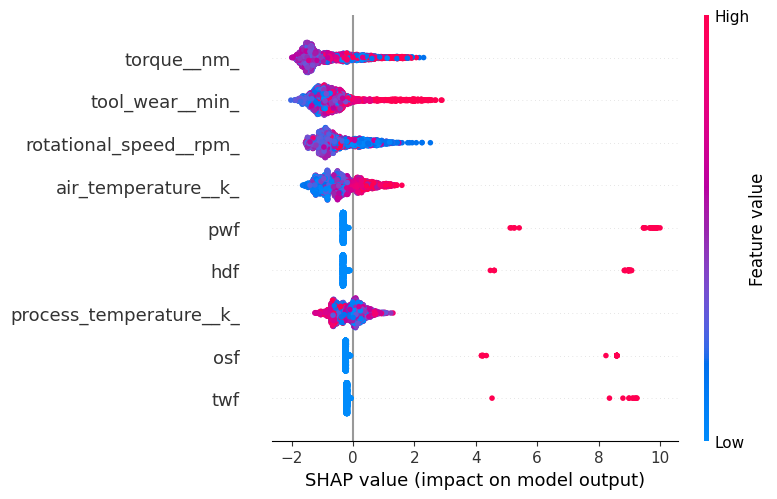

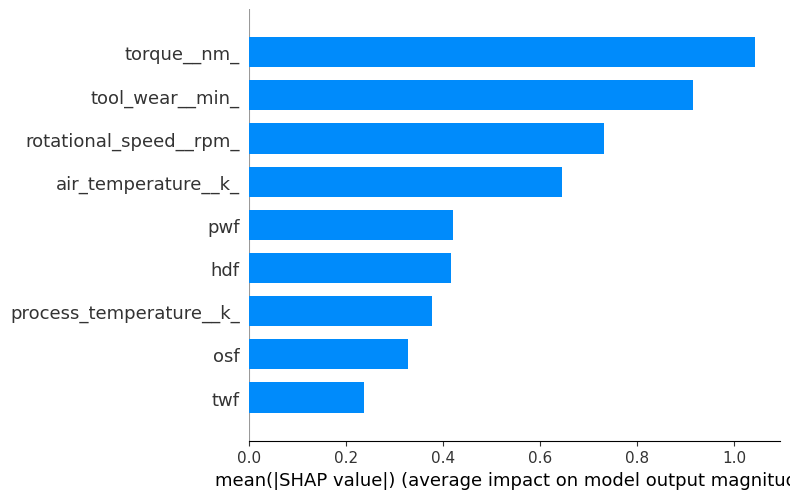

In [35]:
# Run SHAP analysis

shap_analysis(model, X_train, X_test, X.columns)

In [36]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

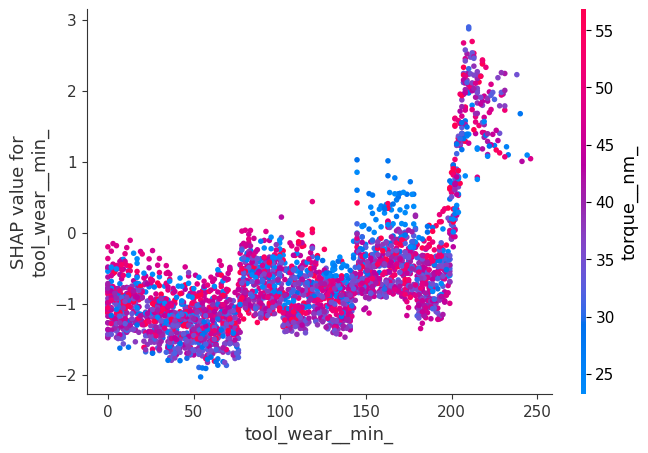

In [37]:
shap.dependence_plot("tool_wear__min_", shap_values.values, X_test, interaction_index="torque__nm_")


SHAP Force Plot

In [38]:
shap.initjs()  
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


In [39]:
shap.force_plot(explainer.expected_value, shap_values.values[:10], X_test.iloc[:10])


SHAP Waterfall Plot

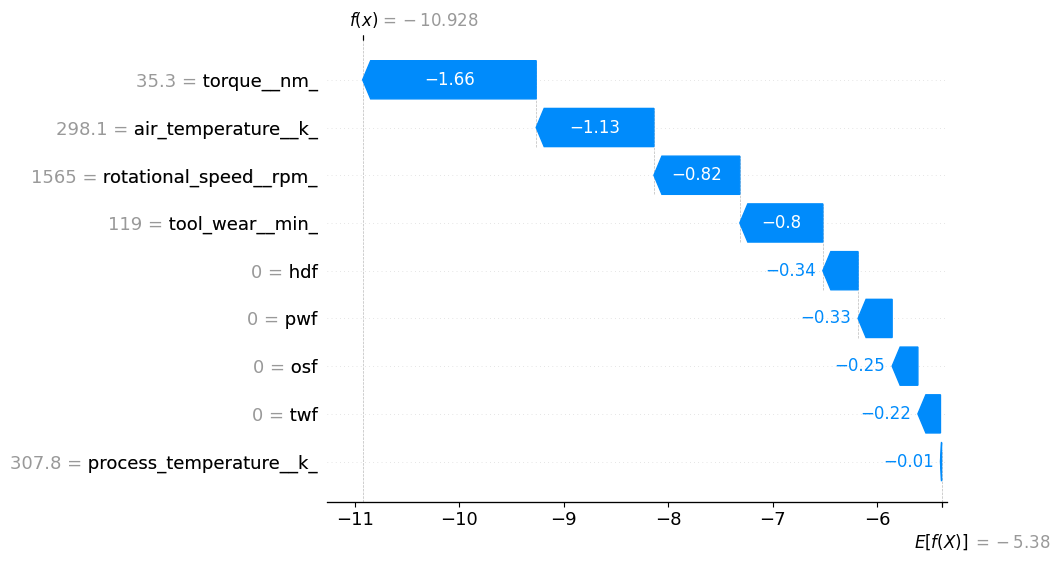

In [30]:
shap.waterfall_plot(shap.Explanation(values=shap_values.values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))


SHAP Decision Plot

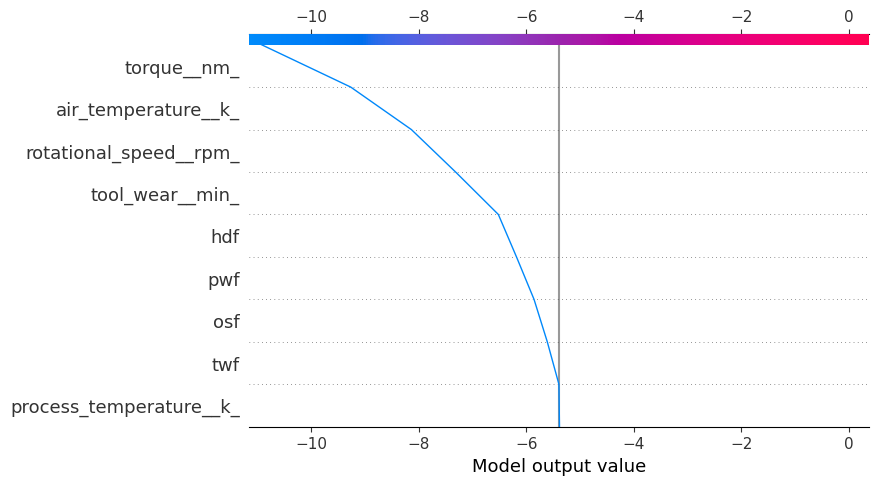

In [31]:
shap.decision_plot(explainer.expected_value, shap_values.values[0], feature_names=X_test.columns.tolist())
